In [1]:
import numpy as np
import pandas as pd
print("Pandas version: ",pd.__version__)

Pandas version:  1.2.4


In [2]:
#データの作成
dates = pd.date_range("20220101", periods = 7)

#DataFrameの作成
#np.random.randn は平均０、標準偏差１の乱数に従う乱数を返す。(a, b)はa×bのarrayということ
df = pd.DataFrame(np.random.randn(7, 4), index = dates, columns = list('ABCD'))

#df.head()は最初の5列だけ表示する！
df.head()

,A,B,C,D
2022-01-01,0.302533,-1.206250,-1.174660,-0.538171
2022-01-02,0.599537,0.625570,-0.547953,-1.293615
2022-01-03,-0.681080,-1.743225,0.149357,-0.514365
2022-01-04,1.040755,-0.782214,-1.309875,-0.423339
2022-01-05,-0.688116,-0.553966,-1.248566,0.178650


In [3]:
#表示のされ方が異なる。not fancy
print(df.head())

                   A         B         C         D
2022-01-01  0.302533 -1.206250 -1.174660 -0.538171
2022-01-02  0.599537  0.625570 -0.547953 -1.293615
2022-01-03 -0.681080 -1.743225  0.149357 -0.514365
2022-01-04  1.040755 -0.782214 -1.309875 -0.423339
2022-01-05 -0.688116 -0.553966 -1.248566  0.178650


In [4]:
#print(df)は全部表示する。
print(df)
print("This was a table printed dirrectly, as it will look in a terminal.")

                   A         B         C         D
2022-01-01  0.302533 -1.206250 -1.174660 -0.538171
2022-01-02  0.599537  0.625570 -0.547953 -1.293615
2022-01-03 -0.681080 -1.743225  0.149357 -0.514365
2022-01-04  1.040755 -0.782214 -1.309875 -0.423339
2022-01-05 -0.688116 -0.553966 -1.248566  0.178650
2022-01-06  1.209712 -0.851000 -0.653363 -0.757338
2022-01-07  0.324251  0.776676 -0.426766  1.050436
This was a table printed dirrectly, as it will look in a terminal.


In [5]:
# Print fancy. Printing this way allows statements to appear after the table.
from IPython.display import display, HTML
display(HTML(df.to_html()))
print("This is the pretty table again, displayed in a different way.")

,A,B,C,D
2022-01-01,0.302533,-1.206250,-1.174660,-0.538171
2022-01-02,0.599537,0.625570,-0.547953,-1.293615
2022-01-03,-0.681080,-1.743225,0.149357,-0.514365
2022-01-04,1.040755,-0.782214,-1.309875,-0.423339
2022-01-05,-0.688116,-0.553966,-1.248566,0.178650
2022-01-06,1.209712,-0.851000,-0.653363,-0.757338
2022-01-07,0.324251,0.776676,-0.426766,1.050436


This is the pretty table again, displayed in a different way.


In [6]:
#Or just have the table be the last item on the cell, which will also give a
#formatted view if used in a notebook.
df

,A,B,C,D
2022-01-01,0.302533,-1.206250,-1.174660,-0.538171
2022-01-02,0.599537,0.625570,-0.547953,-1.293615
2022-01-03,-0.681080,-1.743225,0.149357,-0.514365
2022-01-04,1.040755,-0.782214,-1.309875,-0.423339
2022-01-05,-0.688116,-0.553966,-1.248566,0.178650
2022-01-06,1.209712,-0.851000,-0.653363,-0.757338
2022-01-07,0.324251,0.776676,-0.426766,1.050436


In [7]:
#行名を表示
print(df.index)

#列名を表示
print(df.columns)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


In [8]:
#一列分全てを取得したいとき
df["A"]

#１列の時はpandas.Seriesの扱いになる。
#この場合.to_html()が使えない

# df[["A"]]とすればpandas.DataFrame扱いになる。

2022-01-01    0.302533
2022-01-02    0.599537
2022-01-03   -0.681080
2022-01-04    1.040755
2022-01-05   -0.688116
2022-01-06    1.209712
2022-01-07    0.324251
Freq: D, Name: A, dtype: float64

In [9]:
#Display Fancy!
display(HTML(df[["A"]].to_html()))

,A
2022-01-01,0.302533
2022-01-02,0.599537
2022-01-03,-0.681080
2022-01-04,1.040755
2022-01-05,-0.688116
2022-01-06,1.209712
2022-01-07,0.324251


In [10]:
#displayed fancy automatically
df[["A", "C"]]

,A,C
2022-01-01,0.302533,-1.174660
2022-01-02,0.599537,-0.547953
2022-01-03,-0.681080,0.149357
2022-01-04,1.040755,-1.309875
2022-01-05,-0.688116,-1.248566
2022-01-06,1.209712,-0.653363
2022-01-07,0.324251,-0.426766


In [11]:
#注意：csvファイルはあらかじめJupyter notebookのhome pageにアップロードしておく必要がある！
hydrogen1 = pd.read_csv("hydrogen_1.csv", comment = "#")
hydrogen1.head()

,Wavelength,Intensity
0,177.185,-39.56
1,177.571,-39.56
2,177.957,-39.56
3,178.343,-57.51
4,178.729,43.48


In [12]:
#Change the columns if you want
hydrogen1.columns = ["WV", "IN"]
hydrogen1.head()

,WV,IN
0,177.185,-39.56
1,177.571,-39.56
2,177.957,-39.56
3,178.343,-57.51
4,178.729,43.48


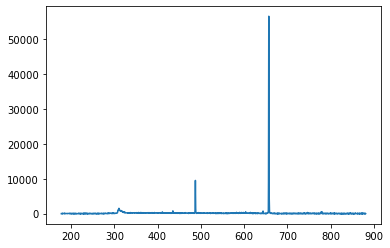

In [13]:
import matplotlib.pyplot as plt

plt.plot(hydrogen1["WV"], hydrogen1["IN"])

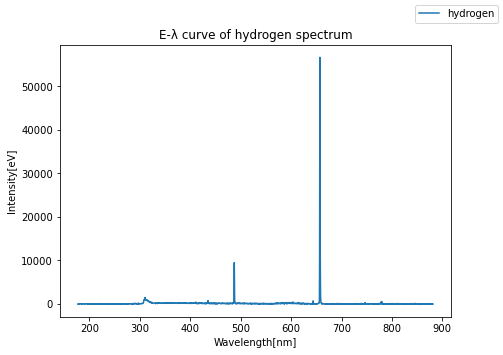

In [14]:
good_hydrogen1 = hydrogen1.loc[hydrogen1["WV"].idxmin() : hydrogen1["WV"].idxmax()]

fig = plt.figure(figsize = (7, 5))

plt.plot(good_hydrogen1["WV"], good_hydrogen1["IN"], label = "hydrogen")
plt.xlabel("Wavelength[nm]")
plt.ylabel("Intensity[eV]")
plt.title("E-λ curve of hydrogen spectrum")

fig.legend()

In [16]:
good_hydrogen1.to_excel("hydrogen_spectrum_data.xlsx")
#なんか開けない　必要になったら調べる

In [17]:
%ls *.xlsx

hydrogen_spectrum_data.xlsx
